<hr>
<h4>📦 Necessary Imports</h4>
<p>This cell imports the essential Python libraries needed for logistic regression:</p>

<ul>
  <li><b>numpy:</b> For efficient numerical operations, array handling, and mathematical functions.</li>
  <li><b>matplotlib.pyplot:</b> For plotting data and visualizing results, such as graphs and charts.</li>
  <li><b>pandas:</b> For loading, manipulating, and analyzing structured data using DataFrames.</li>
</ul>

<h4>📊 Loading the Dataset</h4>
<p>The diabetes dataset is loaded from a CSV file <code>diabetes.csv</code> into a pandas DataFrame named <code>df</code>.</p>
<p>The command <code>df.head(5)</code> displays the first 5 rows of the dataset to give a quick preview of the features and values.</p>

<!-- Optional Simple Example -->
<p><b>Example:</b> If the dataset has columns like <code>Glucose</code>, <code>BMI</code>, and <code>Outcome</code>, <code>df.head(5)</code> will show the top 5 rows with these columns and their sample values.</p>

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<hr>
<h4>🧮 Feature Selection and Normalization</h4>
<p>In this cell, we focus on preparing the data for logistic regression by:</p>

<ul>
  <li><b>Feature Selection:</b> We select only two features, <code>Glucose</code> and <code>BMI</code>, which are important indicators for diabetes prediction.</li>
  <li><b>Target Variable:</b> The target column is <code>Outcome</code>, representing whether a person has diabetes (1) or not (0).</li>
  <li><b>Normalization:</b> Each selected feature is normalized using z-score normalization:</li>
</ul>

<pre>
normalized_value = (original_value - mean) / standard_deviation
</pre>

<p>This scales the features to have a mean of 0 and standard deviation of 1, which helps gradient-based optimization converge faster and improves model performance.</p>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
If the Glucose values are [120, 150, 100], mean = 123.3, std = 25.1

Normalized Glucose for 120:
(120 - 123.3) / 25.1 ≈ -0.13
</pre>

<p>The <code>df.head(5)</code> at the end shows the first 5 rows with normalized features.</p>

In [2]:
# Use only 'Glucose' and 'BMI' as features
features = ['Glucose', 'BMI']
target = 'Outcome'

# Normalize features
for feature in features:
    df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.847771,72,35,0,0.203880,0.627,50,1
1,1,-1.122665,66,29,0,-0.683976,0.351,31,0
2,8,1.942458,64,0,0,-1.102537,0.672,32,1
3,1,-0.997558,66,23,94,-0.493721,0.167,21,0
4,0,0.503727,40,35,168,1.408828,2.288,33,1


<hr>
<h4>📊 Preparing Feature Matrix and Labels</h4>
<p>This cell prepares the input data for logistic regression by:</p>

<ul>
  <li><b>Feature Matrix (X):</b> Extracts the selected features (<code>Glucose</code> and <code>BMI</code>) as a NumPy array.</li>
  <li><b>Label Vector (y):</b> Extracts the target variable (<code>Outcome</code>) as a NumPy array.</li>
  <li><b>Adding Bias Term:</b> Adds a column of 1s to <code>X</code> as the bias (intercept) term. This allows the model to learn an intercept without handling it separately.</li>
  <li><b>Visualization:</b> Converts the new feature matrix with bias back into a DataFrame for easy inspection.</li>
</ul>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
Original features:
Glucose | BMI
120     | 30.0
150     | 28.0

After normalization and adding bias:
Bias | Glucose | BMI
1    | 0.1     | -0.2
1    | 1.1     | -0.5
</pre>

<p>The bias column of 1s helps the logistic regression model include an intercept (bias) term in the linear combination.</p>

In [3]:
# Prepare feature matrix X and label vector y
X = df[features].values
y = df[target].values

# Add bias term (column of 1s)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Create a DataFrame for better visualization
temp = pd.DataFrame(X, columns=['Bias'] + features)
temp.head(5)

,Bias,Glucose,BMI
0,1.0,0.847771,0.203880
1,1.0,-1.122665,-0.683976
2,1.0,1.942458,-1.102537
3,1.0,-0.997558,-0.493721
4,1.0,0.503727,1.408828


<hr>
<h4>🔢 Sigmoid Function</h4>
<p>The <code>sigmoid(z)</code> function maps any real-valued number <code>z</code> to a value between 0 and 1. This makes it perfect for logistic regression, as it represents probability.</p>

<p>Formula: <code>sigmoid(z) = 1 / (1 + exp(-z))</code></p>

<!-- Optional Simple Example -->
<p><b>Example:</b> If <code>z = 0</code>, then <code>sigmoid(0) = 0.5</code>. If <code>z = 2</code>, then <code>sigmoid(2) ≈ 0.88</code>.</p>

In [4]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

<hr>
<h4>📉 Loss Function: Binary Cross-Entropy</h4>
<p>The <code>compute_loss(X, y, weights)</code> function calculates how well the model predicts the data.</p>

<ul>
  <li><b>Prediction:</b> Calculates predicted probabilities by applying the sigmoid function on the weighted sum of inputs.</li>
  <li><b>Binary Cross-Entropy Loss:</b> Measures the difference between actual labels <code>y</code> and predicted probabilities <code>pred</code>.</li>
  <li><b>Stability:</b> Small value <code>1e-10</code> is added inside logarithms to avoid math errors like log(0).</li>
</ul>

<!-- Optional Simple Example -->
<p><b>Example:</b> For a single data point with label <code>y=1</code> and prediction <code>pred=0.9</code>, loss is <code>-log(0.9) ≈ 0.105</code>, a small loss indicating good prediction.</p>

In [5]:
# Loss function (Binary Cross-Entropy)
def compute_loss(X, y, weights):
    z = np.dot(X, weights)
    pred = sigmoid(z)
    loss = -np.mean(y * np.log(pred + 1e-10) + (1 - y) * np.log(1 - pred + 1e-10))
    return loss

<hr>
<h4>✅ Accuracy Calculation</h4>
<p>The <code>accuracy(X, y, weights)</code> function measures how many predictions match the actual labels.</p>

<ul>
  <li>Computes predicted probabilities using sigmoid.</li>
  <li>Converts probabilities to binary class labels with a 0.5 threshold.</li>
  <li>Calculates the fraction of correct predictions as accuracy.</li>
</ul>

<!-- Optional Simple Example -->
<p><b>Example:</b> If out of 100 samples, 85 predictions match the actual labels, accuracy is 0.85 or 85%.</p>

In [6]:
# Accuracy calculation
def accuracy(X, y, weights):
    preds = sigmoid(np.dot(X, weights))
    pred_labels = (preds >= 0.5).astype(int)
    acc = np.mean(pred_labels == y)
    return acc

<hr>
<h4>🚀 Training Logistic Regression with Gradient Descent</h4>
<p>The <code>train(X, y, lr=0.1, epochs=100)</code> function performs the logistic regression training by iteratively updating weights to minimize the loss.</p>

<ul>
  <li><b>Initialize Weights:</b> Start with zeros for all parameters, including bias.</li>
  <li><b>Prediction:</b> Calculate predicted probabilities using the current weights and sigmoid function.</li>
  <li><b>Gradient Computation:</b> Calculate the gradient of the loss w.r.t. weights as <code>(X.T @ (pred - y)) / N</code>.</li>
  <li><b>Weight Update:</b> Adjust weights in the negative gradient direction scaled by the learning rate <code>lr</code>.</li>
  <li><b>Track Progress:</b> Store loss and accuracy at each epoch and print them for monitoring.</li>
</ul>

<p>This process iteratively improves the model’s parameters to better classify the data.</p>

<!-- Optional Simple Example -->
<p><b>Example (Conceptual):</b></p>
<pre>
Epoch 1:
- Initial weights = [0, 0, 0]
- Compute predictions with sigmoid
- Gradient calculated, e.g., gradient = [0.1, -0.05, 0.2]
- Updated weights = weights - lr * gradient
- Loss and accuracy computed and stored
</pre>

<p>Over many epochs, weights move towards values that reduce loss and improve accuracy.</p>

In [7]:
# Train with Gradient Descent
def train(X, y, lr=0.1, epochs=100):
    weights = np.zeros(X.shape[1])
    losses = []
    accuracies = []

    for i in range(epochs):
        z = np.dot(X, weights)
        pred = sigmoid(z)

        # Compute gradient
        gradient = np.dot(X.T, (pred - y)) / len(y)

        # Update weights
        weights -= lr * gradient

        # Compute and store loss
        loss = compute_loss(X, y, weights)
        losses.append(loss)

        # Calculate accuracy
        acc = accuracy(X, y, weights)*100
        accuracies.append(acc)

        # Print progress
        print(f"Epoch {i+1}:\tLoss = {loss:.3f}\tAccuracy = {acc:.2f}%\tWeights = {weights}")

    return weights, losses, accuracies

<hr> <h4>🎨 Plotting the Decision Boundary</h4> <p>The <code>plot_decision_boundary(X, y, weights)</code> function visualizes how the logistic regression model separates the two classes using the learned weights.</p> <ul> <li><b>Grid Generation:</b> Creates a mesh grid covering the range of the two features (Glucose and BMI).</li> <li><b>Prediction over Grid:</b> Computes predicted probabilities for each point on the grid using the sigmoid of the linear model.</li> <li><b>Contour Plot:</b> Uses a filled contour plot to show regions where the predicted probability is below or above 0.5, highlighting the decision boundary.</li> <li><b>Data Points:</b> Plots actual normalized data points colored by their true class for comparison.</li> </ul> <p>This helps you visually understand where the model classifies data points as positive or negative based on the two features.</p> <!-- Simple usage example --> <p><b>Example:</b></p> <pre> weights, losses, accuracies = train(X, y, lr=0.1, epochs=100) plot_decision_boundary(X, y, weights) </pre>

In [8]:
def plot_decision_boundary(X, y, weights):
    # Only works with 2 features + bias
    x_min, x_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    y_min, y_max = X[:,2].min() - 0.5, X[:,2].max() + 0.5
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Generate input grid: add bias term of 1
    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    
    probs = sigmoid(np.dot(grid, weights)).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, cmap="RdBu")
    plt.colorbar(label="Predicted Probability")

    # Plot actual points
    plt.scatter(X[:,1], X[:,2], c=y, cmap="bwr", edgecolors='k')
    plt.xlabel("Glucose (normalized)")
    plt.ylabel("BMI (normalized)")
    plt.title("Decision Boundary")
    plt.grid(True)
    plt.show()

<hr>
<h4>🏁 Training Execution</h4>
<p>Now, we call the <code>train</code> function to train the logistic regression model on the normalized <code>Glucose</code> and <code>BMI</code> features to predict diabetes outcome.</p>

<pre><code>
weights, losses, accuracies = train(X, y, lr=0.1, epochs=100)
</code></pre>

<p>This will output the loss and accuracy at each epoch and return the final weights along with loss and accuracy history arrays for further analysis or plotting.</p>

<p>Once training completes, you can visualize the learning curve or use the learned <code>weights</code> to make predictions on new data points.</p>

In [9]:
# Train the model
weights, losses, accuracies = train(X, y, lr=0.1, epochs=100)

Epoch 1:	Loss = 0.684	Accuracy = 76.82%	Weights = [-0.01510417  0.02222469  0.01394194]
Epoch 2:	Loss = 0.676	Accuracy = 76.69%	Weights = [-0.02983081  0.04381768  0.02741325]
Epoch 3:	Loss = 0.668	Accuracy = 76.69%	Weights = [-0.04418982  0.06479822  0.04042999]
Epoch 4:	Loss = 0.660	Accuracy = 76.69%	Weights = [-0.05819122  0.08518571  0.05300838]
Epoch 5:	Loss = 0.653	Accuracy = 76.69%	Weights = [-0.07184508  0.10499954  0.06516463]
Epoch 6:	Loss = 0.646	Accuracy = 76.69%	Weights = [-0.08516147  0.12425898  0.07691486]
Epoch 7:	Loss = 0.640	Accuracy = 76.69%	Weights = [-0.09815039  0.14298309  0.08827496]
Epoch 8:	Loss = 0.634	Accuracy = 76.69%	Weights = [-0.1108217   0.16119054  0.09926051]
Epoch 9:	Loss = 0.628	Accuracy = 76.69%	Weights = [-0.12318513  0.17889965  0.1098867 ]
Epoch 10:	Loss = 0.622	Accuracy = 76.69%	Weights = [-0.13525018  0.19612823  0.1201683 ]
Epoch 11:	Loss = 0.617	Accuracy = 76.69%	Weights = [-0.14702616  0.21289361  0.13011959]
Epoch 12:	Loss = 0.613	Accurac

<hr> <h4>📊 Plotting the Decision Boundary</h4> <p>To visualize how well our logistic regression model separates the classes, we plot the decision boundary. The decision boundary corresponds to where the model's prediction probability is 0.5, i.e.,</p> <pre> w0 * 1 + w1 * x1 + w2 * x2 = 0 </pre> <p>Here, <code>w0</code> is the bias, and <code>w1, w2</code> are weights for features <code>x1</code> (Glucose) and <code>x2</code> (BMI).</p>

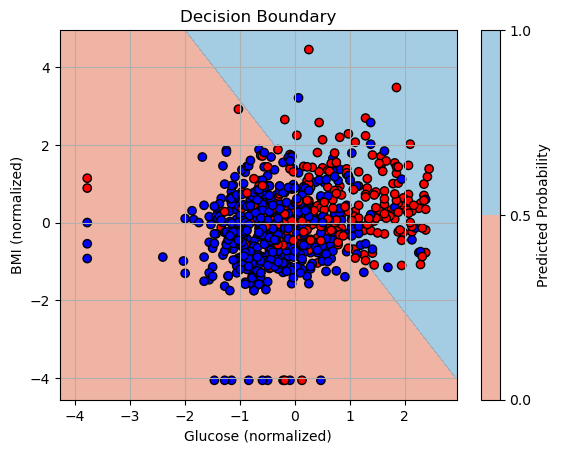

In [10]:
# Plot decision boundary
plot_decision_boundary(X, y, weights)

<hr> <h4>📊 Plotting Training Loss and Accuracy Curves in HTML</h4> <p>Below is a simple example of how to show the loss and accuracy curves side-by-side using HTML and inline styling, similar to the Matplotlib Python plots you made before.</p> <ul> <li><b>Container:</b> A flex container with two child divs to hold the Loss and Accuracy plots side by side.</li> <li><b>Titles:</b> Each plot section has a heading and labels.</li> <li><b>Note:</b> This example uses simple placeholders where you would insert your actual plot images or charts.</li> </ul>

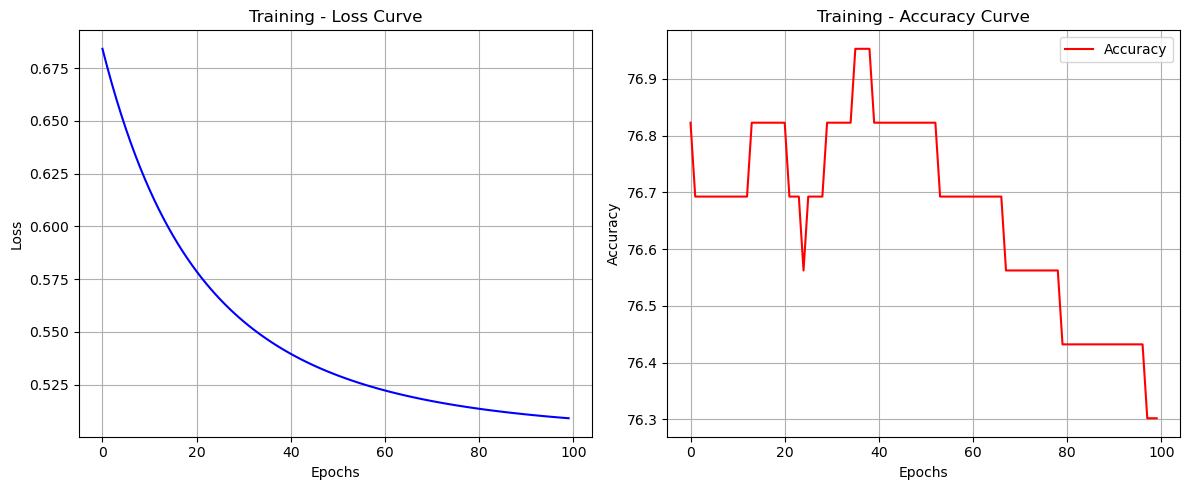

In [11]:
# Create a 1x2 grid of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss on the left (axes[0])
axes[0].plot(losses, color='blue')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].set_title("Training - Loss Curve")
axes[0].grid(True)

# Plot Accuracy on the right (axes[1])
axes[1].plot(accuracies, label='Accuracy', color='red')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Training - Accuracy Curve")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

<hr>
<h4>🎯 Evaluating Model Accuracy</h4>
<p>This cell calculates how well the trained linear regression model fits the data by using an <code>accuracy</code> function.</p>
<ul>
  <li><code>X</code>: input features (data used for prediction)</li>
  <li><code>y</code>: actual target values (true labels)</li>
  <li><code>weights</code>: model parameters learned during training</li>
</ul>
<p>The <code>accuracy</code> function compares the predicted values against the true values and returns a score between 0 and 1.</p>
<p>The final accuracy is then printed as a percentage.</p>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
# If accuracy returns 0.85, it means the model predicts correctly 85% of the time.
print(f"Accuracy: {0.85 * 100:.2f}%")  # Output: Accuracy: 85.00%
</pre>


In [12]:
# Evaluate accuracy
acc = accuracy(X, y, weights)
print(f"\nFinal Accuracy: {acc * 100:.2f}%")


Final Accuracy: 76.30%


<hr>
<h4>🔮 Making Predictions with the Model</h4>
<p>This cell defines a <code>predict</code> function that estimates whether a person is diabetic based on <code>glucose</code> and <code>BMI</code> inputs.</p>
<ul>
  <li><b>Normalization:</b> Inputs are normalized using the mean and standard deviation of the training data to match the scale the model was trained on.</li>
  <li><b>Input Vector:</b> A vector including a bias term (1) and the normalized inputs is created.</li>
  <li><b>Probability Calculation:</b> The sigmoid function is applied to the weighted sum of inputs to get a probability between 0 and 1.</li>
  <li><b>Decision Threshold:</b> If the probability is 0.5 or higher, the prediction is "Diabetic", otherwise "Not Diabetic".</li>
</ul>
<p>An example prediction for a person with glucose level 148 and BMI 33.6 is shown below.</p>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
# Probability 0.7 means 70% chance the person is diabetic.
probability = 0.7
status = "Diabetic" if probability >= 0.5 else "Not Diabetic"
print(f"Status: {status}, Probability: {probability:.2f}")
</pre>

In [13]:
# Predict on new input
def predict(glucose, bmi):
    # Normalize input using dataset stats
    glucose = (glucose - df['Glucose'].mean()) / df['Glucose'].std()
    bmi = (bmi - df['BMI'].mean()) / df['BMI'].std()
    
    input_vec = np.array([1, glucose, bmi])
    prob = sigmoid(np.dot(input_vec, weights))
    
    return "Diabetic" if prob >= 0.5 else "Not Diabetic", prob

# Example prediction
status, probability = predict(glucose=148, bmi=33.6)
print(f"\nPrediction: {status} (Probability: {probability:.2f})")


Prediction: Diabetic (Probability: 1.00)


<hr>